In [3]:
#*********************************************
# Name: Jonah Zembower
# Date: March 16, 2024
# Assignment: Project 2 Advanced Data Science
#*********************************************

# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting to Know Customers

In [4]:
# laod the dataset
df = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Advanced Data Science/Dataset/ecommerce_customer_data.csv')

In [5]:
# display the first 5 rows of the dataset
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently
0,1,56,134,36,Female,10,Home & Kitchen,1
1,2,69,34,97,Female,13,Fashion,1
2,3,46,138,36,Male,19,Electronics,1
3,4,32,47,3,Male,11,Electronics,1
4,5,60,58,73,Male,13,Home & Kitchen,0


In [6]:
# gives an overview of the dataset
df.describe(include='all')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender,Total Purchases,Category Most Purchased,Purchased Recently
count,1000.000000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,2,NaN,3,NaN
top,NaN,NaN,NaN,NaN,Male,NaN,Home & Kitchen,NaN
freq,NaN,NaN,NaN,NaN,523,NaN,345,NaN
mean,500.500000,43.81900,83.095000,48.829000,NaN,10.240000,NaN,0.486000
std,288.819436,14.99103,37.910621,29.461666,NaN,5.471594,NaN,0.500054
min,1.000000,18.00000,20.000000,1.000000,NaN,1.000000,NaN,0.000000
25%,250.750000,31.00000,51.000000,22.000000,NaN,5.750000,NaN,0.000000
50%,500.500000,44.00000,82.000000,48.000000,NaN,10.000000,NaN,0.000000
75%,750.250000,56.00000,117.000000,74.250000,NaN,15.000000,NaN,1.000000


In [7]:
# Descriptive Statistics for Demographic Characteristics and Purchasing Behavior
demographic_purchasing_descriptives = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Total Purchases']].describe()

# Gender Distribution
gender_distribution = df['Gender'].value_counts(normalize=True) * 100

# Category Most Purchased Distribution
category_distribution_percent = df['Category Most Purchased'].value_counts(normalize=True) * 100

# Recent Purchase Activity
recent_purchase_activity = df['Purchased Recently'].value_counts(normalize=True) * 100

demographic_purchasing_descriptives, gender_distribution, category_distribution_percent, recent_purchase_activity


(              Age  Annual Income (k$)  Spending Score (1-100)  Total Purchases
 count  1000.00000         1000.000000             1000.000000      1000.000000
 mean     43.81900           83.095000               48.829000        10.240000
 std      14.99103           37.910621               29.461666         5.471594
 min      18.00000           20.000000                1.000000         1.000000
 25%      31.00000           51.000000               22.000000         5.750000
 50%      44.00000           82.000000               48.000000        10.000000
 75%      56.00000          117.000000               74.250000        15.000000
 max      69.00000          149.000000              100.000000        19.000000,
 Male      52.3
 Female    47.7
 Name: Gender, dtype: float64,
 Home & Kitchen    34.5
 Fashion           33.3
 Electronics       32.2
 Name: Category Most Purchased, dtype: float64,
 0    51.4
 1    48.6
 Name: Purchased Recently, dtype: float64)

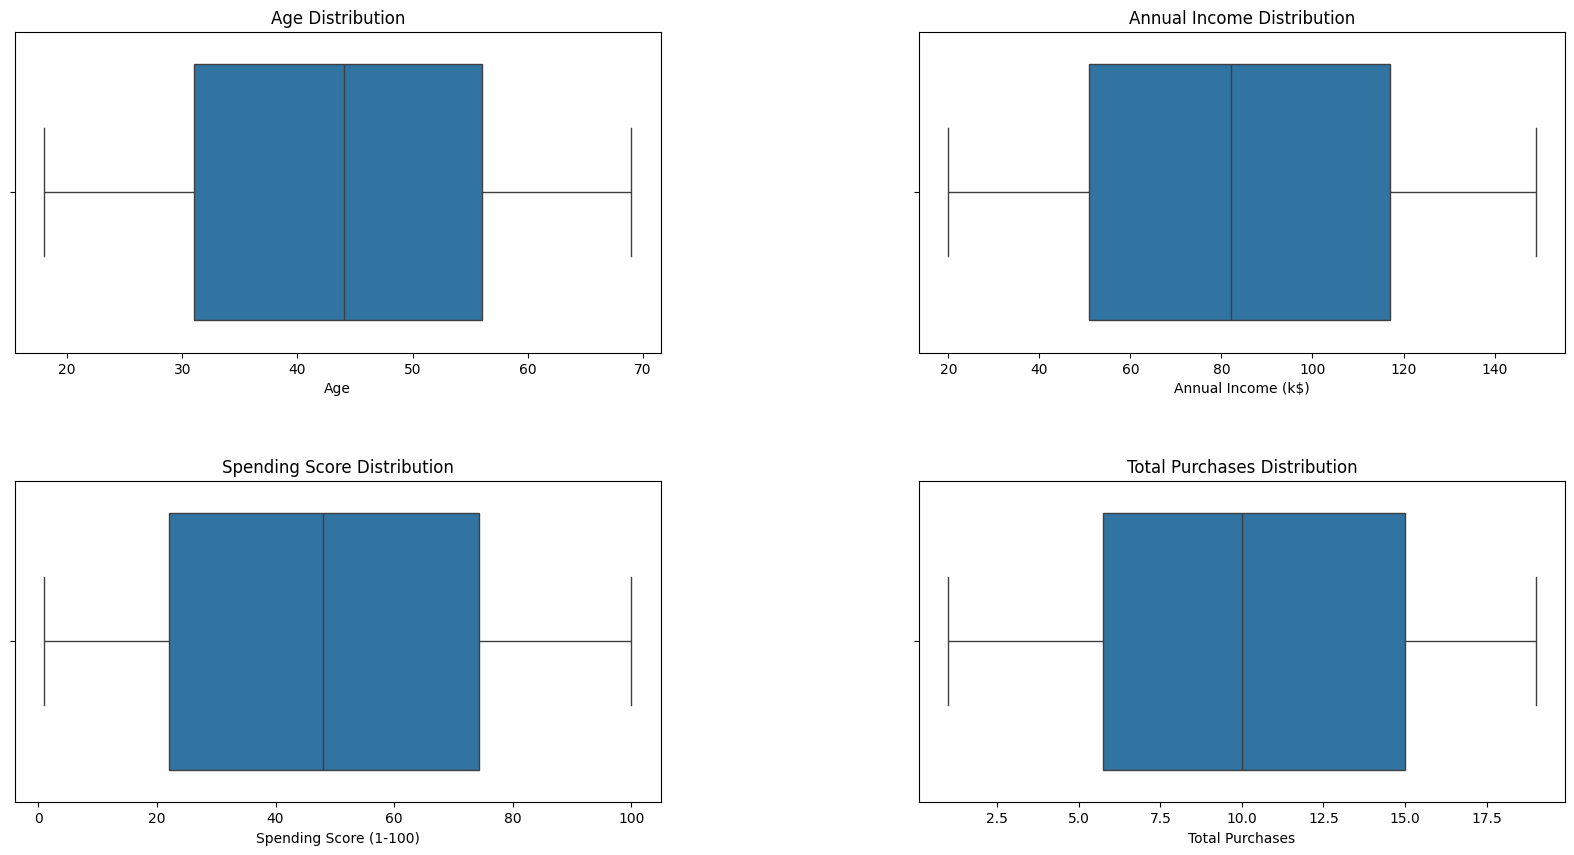

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size and layout
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Age Box Plot
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')

# Annual Income Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Annual Income Distribution')

# Spending Score Box Plot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Spending Score Distribution')

# Total Purchases Box Plot
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Total Purchases'])
plt.title('Total Purchases Distribution')

plt.show()


Based on the overview of the dataset, initially, I can see that there are 8 variables that can be used to identify customers.

I also got the means for each variable, standard deviation, and other factors to get a general understanding of the dataset variables. 

Specifically, we may want to focus in on some variables more than others. 

A general description of the variables is as follows:

1. CustomerID: A unique identifier for each customer.
2. Age: The age of the customer.
3. Annual Income (k$): The annual income of the customer in thousands of dollars.
4. Spending Score (1-100): A score assigned to the customer based on their spending behavior, with 1 being the lowest and 100 being the highest.
5. Gender: The gender of the customer (Male/Female).
6. Total Purchases: The total number of purchases made by the customer.
7. Category Most Purchased: The category in which the customer has made the most purchases (e.g., Home & Kitchen, Fashion, Electronics).
8. Purchased Recently: Indicates whether the customer has made a purchase recently (1 for yes, 0 for no).

Overall, there is a lot of diversity in the values that creates an even spread within most of the variables such as age, annual income, spending score, and total purchases. 

There appears to be more males than females. This will affect our future clustering methods. Realistically, we will have more clusters that represent males due to this difference. 

The category most purchased is relatively similar in values but shows some slight favor to Home and Kitchen. This will be reflected in the clusters. 

Recent purchase activity shows that about 50% have recently purchased something. That is relatively high and will affect the customer persona groupings. 

I will first try to develop an understanding of the customer dataset. I want to find patterns for the data that show up throughout the dataset and also any particular differences. 

First, I will find the correlations between any of the variables potentially.

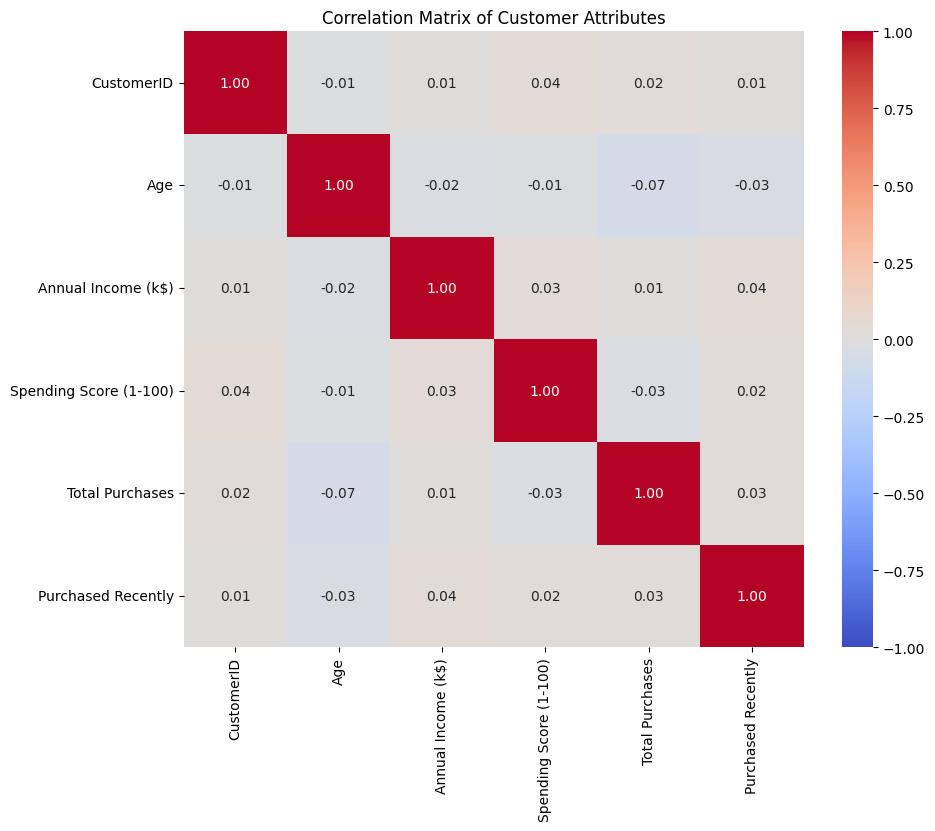

In [7]:
# making the correlation matrix from the dataset
correlation_matrix = df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Customer Attributes')
plt.show()

From this correlation matrix, we can see that there appear to be no correlations between any of the variables.

We will proceed with the variables as follows. 

Now we will look to create customer personas from the customer data.

To do this, I will use a clustering technique. 

# Crafting Customer Personas

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

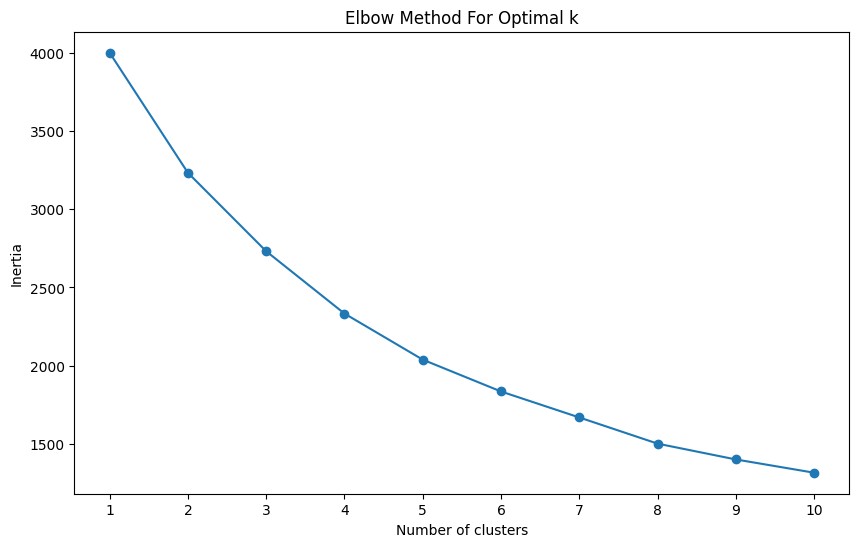

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Total Purchases']]
features_standardized = StandardScaler().fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()


The adjusted elbow curve, based on a narrower range of k values from 1 to 5, shows the inertia (sum of squared distances of samples to their closest cluster center) for each number of clusters. Observing the plot, we look for the "elbow" point, where the decrease in inertia starts to slow down, indicating diminishing returns on increasing the number of clusters.

From the plot, it appears that the elbow point is at k=3 or k=4, where the rate of decrease in inertia begins to plateau. This suggests that choosing 3 or 4 clusters could be optimal for segmenting our customer base.

I will now proceed with segmenting the customers into 3 clusters as an initial approach. We can then analyze the characteristics of each cluster to identify distinct customer personas.

In [10]:
# Performing K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Summary statistics of each cluster for key variables
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Total Purchases': ['mean', 'std'],
    'Gender': lambda x: x.value_counts().index[0] # Most common gender in each cluster
}).round(2)

cluster_summary


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Age        Annual Income (k$)        Spending Score (1-100)         \
          mean    std               mean    std                   mean    std   
Cluster                                                                         
0        47.14  14.69              88.29  33.38                  50.19  29.02   
1        44.08  14.78              46.67  17.56                  45.88  28.92   
2        39.13  14.44             117.69  20.21                  50.39  30.48   

        Total Purchases         Gender  
                   mean   std <lambda>  
Cluster                                 
0                  4.62  2.55     Male  
1                 13.03  3.75     Male  
2                 14.50  3.19   Female

From these clusters, we can start to develop potential customer types this way. 

1. The first cluster has an average age at 47 and an average income that is about middle class. The spending score is interestingly high as well but the total purchases is lower. The gender is male. 
2. The second cluster has an average age of 44 and an average income that is lower class. The spending score is lower and the total purchases are surprisingly elevated. The gender is male. 
3. The third cluster has an average age at 39 and an average income that is upper class. The spending score is the highest and the total purchases are also the highest. The gender is female. 

Now, I will look into creating specific customer types. I want to focus in on particularly the category most purchased or purchased recently as factors for how these customers relate to one another. 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting relevant features for clustering again, excluding non-numeric for the clustering process
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Total Purchases']]
features_standardized = StandardScaler().fit_transform(features)

# Performing K-means clustering with k=3 as determined earlier
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Now, let's examine the distribution of "Category Most Purchased" and "Purchased Recently" within each cluster
# Starting with "Category Most Purchased"
category_distribution = df.groupby(['Cluster', 'Category Most Purchased']).size().unstack(fill_value=0)

# Then, "Purchased Recently"
purchased_recently_distribution = df.groupby(['Cluster', 'Purchased Recently']).size().unstack(fill_value=0)

category_distribution, purchased_recently_distribution


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(Category Most Purchased  Electronics  Fashion  Home & Kitchen
 Cluster                                                      
 0                                116      118             148
 1                                106      111             112
 2                                100      104              85,
 Purchased Recently    0    1
 Cluster                     
 0                   191  191
 1                   178  151
 2                   145  144)

Using this information, we can refine our customer personas by incorporating their most purchased categories and recent purchasing behavior:

Cluster 0 (Balanced Buyer): Tends to be evenly interested in all categories with a slight preference for "Home & Kitchen." This cluster is active, with nearly half having made a recent purchase. They might represent a "Family-Focused Shopper" who buys across different categories to meet family needs and is consistently engaged with the store.

Cluster 1 (Selective Shopper): Shows a balanced category interest but is less likely to buy "Electronics" items. This cluster has a below even split in terms of recent purchasing activity, suggesting they are selective and possibly deal-driven shoppers.

Cluster 2 (Evenly Diverse Shopper): Exhibits the most even distribution in purchasing across categories, with a balanced recent purchase behavior. The highest purchase categories are "Electronics" and "Fashion." This cluster could represent "Versatile Shoppers" who have broad interests and shop for a variety of needs, though they are slightly less active in terms of recent purchases compared to Cluster 0.



Persona 1: The Family-Focused Shopper (Cluster 0)
Age Range: Broad, with a mean around mid-40s.
Annual Income: Middle to upper-middle class.
Spending Score: Moderately high, indicating a willingness to spend on quality items.
Total Purchases: Moderately frequent, focused on necessities and occasional indulgences.
Gender: Slightly more males than females.
Category Most Purchased: Shows a preference for "Home & Kitchen," suggesting a focus on family and home life.
Purchased Recently: About half have made a recent purchase, indicating consistent shopping habits.

Characteristics and Purchasing Decisions: Most likely values quality and practicality, looking for items that offer long-term value for themselves and their family.
Likely responsive to promotions on home goods, kitchen gadgets, and family-oriented products.
Prefers shopping experiences that offer convenience and reliability.

Persona 2: The Selective Shopper (Cluster 1)
Age Range: Similar to Persona 1, with a mean in the mid-40s.
Annual Income: Lower class, with a careful approach to budgeting.
Spending Score: Lower, showing a cautious approach to spending.
Total Purchases: Fewer, but more deliberate, focusing on specific needs or interests.
Gender: Predominantly male.
Category Most Purchased: Balanced, with a slight avoidance of "Home & Kitchen," indicating a focus on personal or specific household needs rather than general home items.
Purchased Recently: Split between recent and not-so-recent purchases, suggesting selective buying behavior based on needs or deals.

Characteristics and Purchasing Decisions:
Seeks value and discounts, making purchases based on deals or specific requirements rather than impulse or trend.
Might be more responsive to targeted promotions on electronics, fashion, or home and kitchen items that align with their interests.
Appreciates clear, straightforward marketing that highlights product benefits and value.

Persona 3: The Versatile Shopper (Cluster 2)
Age Range: Slightly younger, with a mean in the late 30s to early 40s.
Annual Income: Higher, indicating disposable income for a variety of purchases.
Spending Score: High, showing an enthusiasm for shopping and trying new products.
Total Purchases: More frequent, indicating a broader range of interests and a willingness to explore different categories.
Gender: More females than males.
Category Most Purchased: Evenly spread across categories, indicating diverse interests and a willingness to explore.
Purchased Recently: A mix, with a slightly higher number not making recent purchases, suggesting they shop in bursts or seasonally.

Characteristics and Purchasing Decisions: Open to exploring new products and trends, with a particular interest in fashion, technology, and home decor.
Likely to be influenced by brand reputation, quality, and the latest trends.
Appreciates a personalized shopping experience, recommendations, and loyalty rewards.

Marketing Implications: For each persona, tailoring marketing strategies to their preferences and purchasing behavior. This includes personalized email campaigns, targeted ads, and promotions for categories they're most interested in. Lastly, ensuring a seamless and engaging online shopping experience can cater to the diverse needs of these personas, encouraging loyalty and long-term engagement.

# Predicting Customer Behavior

To foresee whether a customer will make a purchase soon, a predictive model can be developed. This model will analyze customer attributes, past purchasing behavior, and interactions with the business to estimate the likelihood of future purchases. Here is a potential approach to predicitng these outcomes:

### 1. Feature Selection and Engineering
Key Attributes: Use attributes such as Age, Annual Income, Spending Score, Total Purchases, Gender, Category Most Purchased, and whether they Purchased Recently as features.

Engineering New Features: Create new features that might influence purchasing behavior, such as days since last purchase, frequency of purchases in certain categories, and changes in spending score over time.

### 2. Model Development

Choosing a Model: Given this is a classification problem (will purchase/won't purchase soon), models like Logistic Regression, Random Forest, 
Gradient Boosting, or Neural Networks could be appropriate.

Training the Model: Use historical data to train the model, ensuring to balance the dataset if necessary to avoid bias towards one outcome.

Validation and Tuning: Employ cross-validation and adjust hyperparameters to improve accuracy and minimize overfitting or potential undrefitting, so that the company can be prepared in their production output. 

### 3. Model Deployment and Monitoring

Deployment: Integrate the predictive model with the customer database to run predictions regularly, updating customer profiles with their likelihood of making a purchase soon.

Monitoring: Continuously monitor the model's performance and adjust as necessary based on feedback and changing customer behavior.

### Benefits of Accurately Predicting Customer Purchases

Targeted Marketing Efforts: Direct resources more efficiently by focusing on customers predicted to make a purchase soon, customizing marketing messages and offers to their preferences.

Inventory Management: Adjust stock levels based on predicted demand in certain categories, reducing overstock and stockouts.

Customer Experience Improvement: Anticipate customer needs and offer timely promotions or assistance, enhancing satisfaction and loyalty.

Revenue Growth: Increase conversion rates through personalized engagement strategies, driving sales and revenue.

### Strategies to Capitalize on Predictions

Personalized Promotions: Offer personalized discounts or exclusive access to new products for customers predicted to purchase soon, based on their preferred categories.

Loyalty Programs: Enhance loyalty program offers for customers with a high likelihood of making a purchase, encouraging loyalty to buying your products. 

Customer Outreach: Implement targeted outreach strategies, such as personalized emails or SMS messages, to engage customers at the right moment.

Dynamic Pricing: Adjust pricing dynamically for high-demand items or for customers showing high purchase intent, optimizing profit margins.

Predictive Restocking: Use predictions to inform restocking schedules and quantities, especially for high-turnover items or in anticipation of sales events.

By employing a data-driven approach to predict customer purchasing behavior, we can operate more efficiently, improve customer satisfaction, and drive revenue growth. The key lies in continuously refining the predictive model and strategies based on actual customer behavior and feedback.

# Enhancing Marketing Strategies

Based on the analysis and the customer personas developed, targeted marketing strategies can be crafted to engage different types of customers effectively. Personalized marketing plays a crucial role in enhancing customer satisfaction and sales by delivering content and offers that pertain to each fo the preferences and needs of the consumers. Here's how targeted strategies can be applied to the customer personas identified:

### For The Family-Focused Shopper (Cluster 0)

Content Marketing: Share blogs, videos, and articles on home improvement, family activities, and cooking recipes that appeal to their interest in home and kitchen products.

Special Offers: Provide bundle deals or discounts on family-centric products, especially during holiday seasons or school breaks.

Loyalty Rewards: Offer points or rewards for frequent purchases that can be redeemed on items that cater to family needs.

### For The Selective Shopper (Cluster 1)

Flash Sales and Limited Offers: Alert them to time-limited offers and exclusive deals on electronics, fashion, and home and kitchen items, encouraging quick decisions.

Deal of the Day: A daily deal on a high-value item in their preferred category could trigger their interest in making a purchase.

Personalized Recommendations: Send personalized product recommendations based on their past purchases and browsing behavior.

### For The Versatile Shopper (Cluster 2)

New Arrivals Preview: Give them early access to new products or collections, making them feel valued and encouraging early purchases.

Interactive Campaigns: Engage them with interactive content like quizzes or polls that recommend products based on their responses.

VIP Programs: Invite them to a VIP program that offers exclusive benefits, including special discounts, free shipping, or early access to sales events.

### Role of Customer Insights in Shaping Marketing Campaigns

Customer insights derived from data analysis are important for tailoring marketing efforts to meet the specific needs and preferences of different customer segments. Understanding customer behavior, preferences, and purchasing patterns allows businesses to:

Segment Audiences Effectively: Group customers based on their behavior and preferences for more targeted communication.

Personalize Messages: Craft messages that pertain to each individual customer, increasing engagement and conversion rates.

Optimize Marketing Spend: Allocate resources to channels and strategies that yield the highest return on investment, based on customer engagement and conversion data.

Improve Product Offerings: Tailor product development and stock based on customer preferences and demand patterns.

### Informing Future Marketing Efforts

The findings from the customer analysis can inform future marketing efforts by highlighting effective strategies and areas for improvement. Continuous analysis of customer behavior and feedback can lead to:

Adapting Strategies: Quickly adjust strategies in response to changing customer preferences and market trends.

Enhancing Personalization: Use advanced analytics to refine personalization techniques, making marketing messages even more relevant and engaging.

Innovating Engagement: Identify emerging patterns or new customer needs that can be addressed with innovative marketing campaigns or product offerings.

Personalized marketing, grounded in deep customer insights, not only improves customer satisfaction by making customers feel understood and valued but also increases sales by presenting the right offers to the right customers at the right time.